In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
from scipy.signal import savgol_filter

In [83]:
# df = pd.read_csv('lr_range_test_AM0-399_2.csv', index_col=0)
df = pd.read_csv('lr_range_test_AM0-398_2.csv', index_col=0)

In [84]:
df.head()

,iteration,mseloss,agedelta,lr
1,1,3827.565918,61.426708,0.0001
2,2,3998.081543,62.855431,0.0002
3,3,3354.610840,57.297409,0.0003
4,4,3789.231934,61.082542,0.0004
5,5,2738.033203,51.737511,0.0005


In [85]:
df.agedelta[1]

61.42670822143555

(0.0, 5000.0)

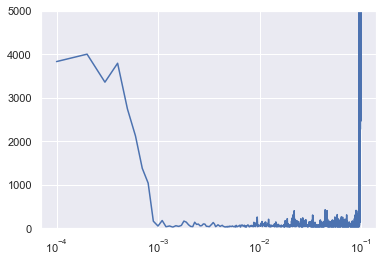

In [86]:
plt.figure()
# plt.plot(df.lr, df.kldloss)
plt.plot(df.lr, df.mseloss)
plt.xscale('log')
plt.ylim([0,5000])

In [87]:
df['change'] = df.mseloss
for i in range(df.shape[0]):
    if i == 0:
        df.change.iloc[0]= 0.0
    else:
        df.change.iloc[i] = df.mseloss.iloc[i] - df.mseloss.iloc[i-1]
# df[['change_running','lr_running']] = df.rolling(window=10).mean()[['change','lr']]
# df[['mse_running','lr_running']] = df.rolling(window=30).mean()[['mseloss','lr']]



/Users/aroibu_admin/agemapper/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


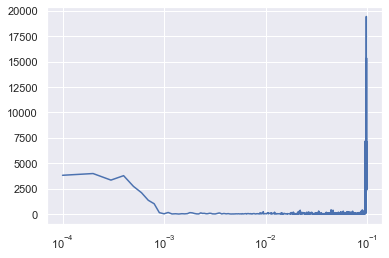

In [88]:
a = savgol_filter(df.mseloss, 3, 2)
plt.plot(df.lr, a)
plt.xscale('log')

In [89]:
df.mse_running = savgol_filter(df.mseloss, 3, 2)
df.change_running = savgol_filter(df.change, 11, 2)
df.age_delta_running = savgol_filter(df.agedelta, 3, 2)

<ipython-input-89-dc9b82c3843d>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.mse_running = savgol_filter(df.mseloss, 3, 2)
<ipython-input-89-dc9b82c3843d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.change_running = savgol_filter(df.change, 11, 2)
<ipython-input-89-dc9b82c3843d>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.age_delta_running = savgol_filter(df.agedelta, 3, 2)


In [90]:
df

,iteration,mseloss,agedelta,lr,change
1,1,3827.565918,61.426708,0.000100,0.000000
2,2,3998.081543,62.855431,0.000200,170.515625
3,3,3354.610840,57.297409,0.000300,-643.470703
4,4,3789.231934,61.082542,0.000400,434.621094
5,5,2738.033203,51.737511,0.000500,-1051.198730
...,...,...,...,...,...
995,995,2927.700195,53.794342,0.099401,167.695312
996,996,2488.093506,49.604813,0.099501,-439.606689
997,997,7113.112793,84.050758,0.099600,4625.019287
998,998,4217.291992,64.808128,0.099700,-2895.820801


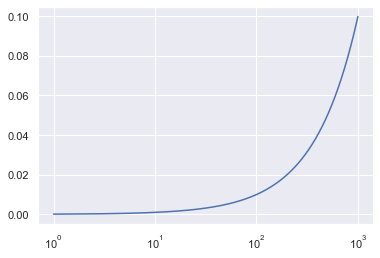

In [91]:
plt.plot(df.lr)
plt.xscale('log')

(-1000.0, 1000.0)

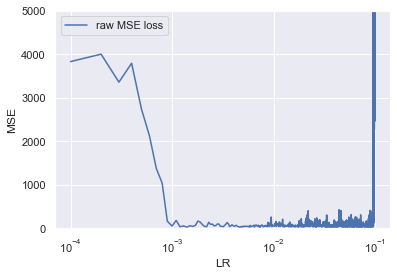

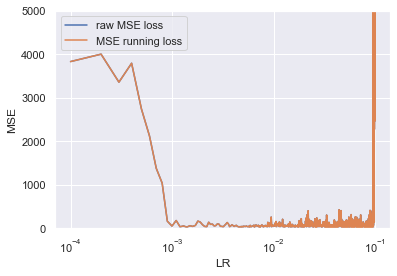

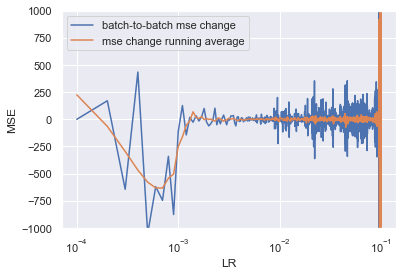

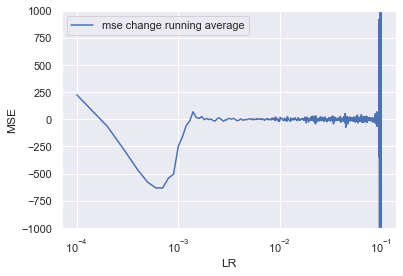

In [92]:
plt.figure()
plt.plot(df.lr, df.mseloss, label='raw MSE loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('MSE')
plt.legend()
plt.ylim([0,5000])

plt.figure()
plt.plot(df.lr, df.mseloss, label='raw MSE loss')
plt.plot(df.lr, df.mse_running, label='MSE running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('MSE')
plt.legend()
plt.ylim([0,5000])

plt.figure()
plt.plot(df.lr, df.change, label='batch-to-batch mse change')
plt.plot(df.lr, df.change_running, label='mse change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('MSE')
plt.ylim([-1000,1000])

plt.figure()
plt.plot(df.lr, df.change_running, label='mse change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('MSE')
plt.ylim([-1000,1000])

(0.0001, 1)

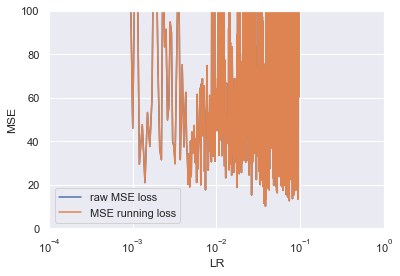

In [93]:
plt.figure()
plt.plot(df.lr, df.mseloss, label='raw MSE loss')
plt.plot(df.lr, df.mse_running, label='MSE running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('MSE')
plt.legend()
plt.ylim([0,100])
plt.xlim([1e-4, 1])

In [94]:
df['age_change'] = df.agedelta
for i in range(df.shape[0]):
    if i == 0:
        df.age_change.iloc[0]= 0.0
    else:
        df.age_change.iloc[i] = df.agedelta.iloc[i] - df.agedelta.iloc[i-1]
# df[['age_change_running','lr_running']] = df.rolling(window=10).mean()[['age_change','lr']]
# df[['age_running','lr_running']] = df.rolling(window=30).mean()[['agedelta','lr']]

age_change_running = savgol_filter(df.age_change, 3, 2)
age_running = savgol_filter(df.agedelta, 3,2 )

/Users/aroibu_admin/agemapper/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [95]:
df

,iteration,mseloss,agedelta,lr,change,age_change
1,1,3827.565918,61.426708,0.000100,0.000000,0.000000
2,2,3998.081543,62.855431,0.000200,170.515625,1.428722
3,3,3354.610840,57.297409,0.000300,-643.470703,-5.558022
4,4,3789.231934,61.082542,0.000400,434.621094,3.785133
5,5,2738.033203,51.737511,0.000500,-1051.198730,-9.345032
...,...,...,...,...,...,...
995,995,2927.700195,53.794342,0.099401,167.695312,2.047504
996,996,2488.093506,49.604813,0.099501,-439.606689,-4.189529
997,997,7113.112793,84.050758,0.099600,4625.019287,34.445946
998,998,4217.291992,64.808128,0.099700,-2895.820801,-19.242630


AttributeError: 'DataFrame' object has no attribute 'age_running'

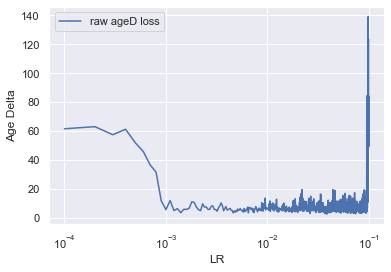

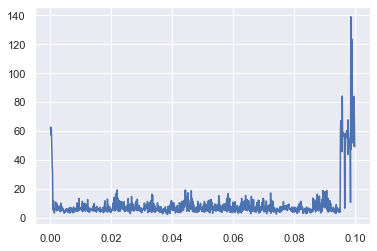

In [96]:
plt.figure()
plt.plot(df.lr, df.agedelta, label='raw ageD loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.legend()

plt.figure()
plt.plot(df.lr, df.agedelta, label='raw ageD loss')
plt.plot(df.lr, df.age_running, label='ageD running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.legend()

plt.figure()
plt.plot(df.lr, df.age_change, label='batch-to-batch ageD change')
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('Age Delta')

plt.figure()
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('KLD')
plt.ylabel('Age Delta')

AttributeError: 'DataFrame' object has no attribute 'age_change_running'

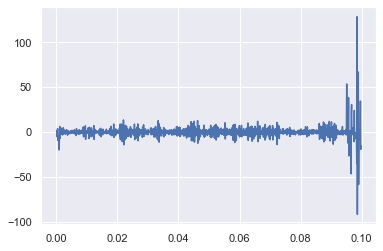

In [97]:
plt.figure()
plt.plot(df.lr, df.age_change, label='batch-to-batch ageD change')
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.ylim([-10, 10])